In [3]:
import pandas as pd
import numpy as np
loan_data = pd.read_excel('/content/loan_Sanction_status_Cleaned.xlsx')

In [6]:
loan_data.head()

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1,NaN,NaN,NaN
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0,NaN,NaN,NaN
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,1,NaN,NaN,NaN
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1,NaN,NaN,NaN
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,1,NaN,NaN,NaN


In [9]:
loan_data = loan_data.drop(columns=['Unnamed: 13','Unnamed: 14','Unnamed: 15'], axis=1)

In [ ]:
loan_data.describe()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,262.075532,1.200355,0.643617,0.755319,1.214539,0.148936,5466.436170,1530.448440,342.595745,0.842199,1.969858,0.682624
std,818.638819,0.400621,0.479355,1.016938,0.410867,0.356342,6271.344106,2471.721359,63.838715,0.364878,0.784494,0.465868
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,36.000000,0.000000,1.000000,0.000000
25%,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2892.750000,0.000000,360.000000,1.000000,1.000000,0.000000
50%,128.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3815.000000,1105.500000,360.000000,1.000000,2.000000,1.000000
75%,172.250000,1.000000,1.000000,2.000000,1.000000,0.000000,5803.750000,2250.000000,360.000000,1.000000,3.000000,1.000000
max,12400.200000,2.000000,1.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,480.000000,1.000000,3.000000,1.000000


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   LoanAmount         564 non-null    float64
 2   Gender             564 non-null    int64  
 3   Married            564 non-null    int64  
 4   Dependents         564 non-null    int64  
 5   Education          564 non-null    int64  
 6   Self_Employed      564 non-null    int64  
 7   ApplicantIncome    564 non-null    int64  
 8   CoapplicantIncome  564 non-null    float64
 9   Loan_Amount_Term   564 non-null    int64  
 10  Credit_History     564 non-null    int64  
 11  Property_Area      564 non-null    int64  
 12  Loan_Status        564 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 57.4+ KB


In [11]:
loan_data.isnull().sum()

,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [12]:
loan_data.duplicated().sum()

np.int64(0)

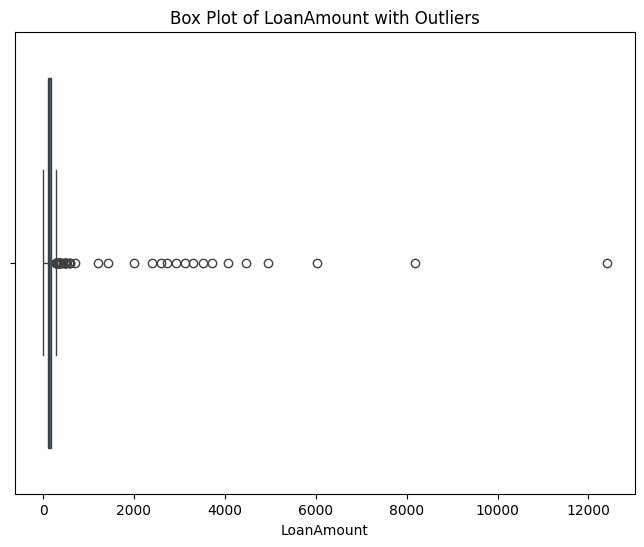

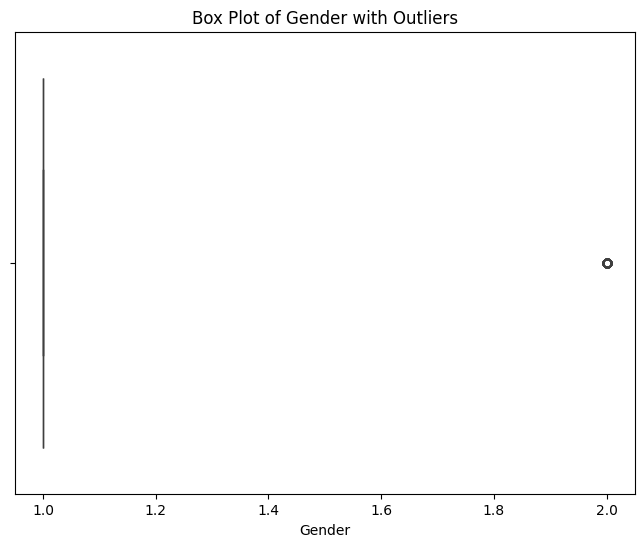

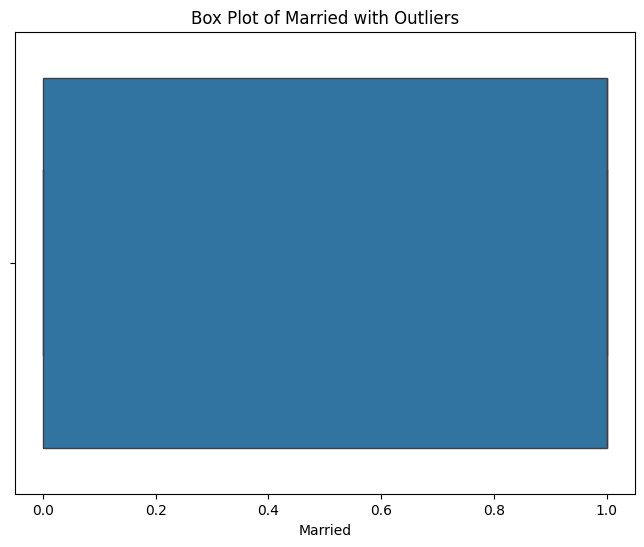

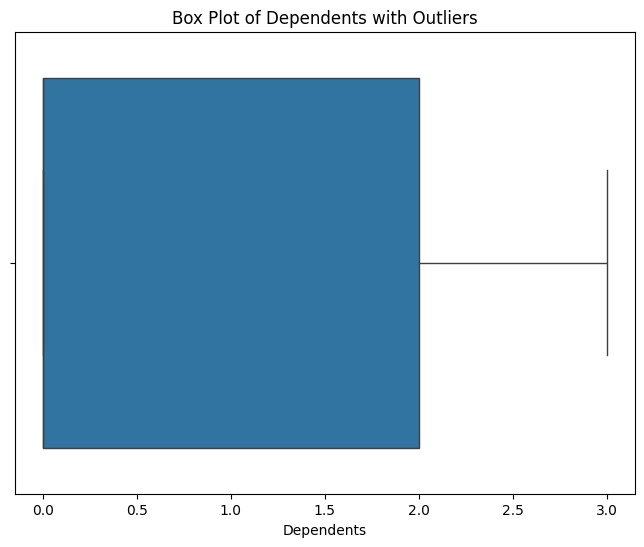

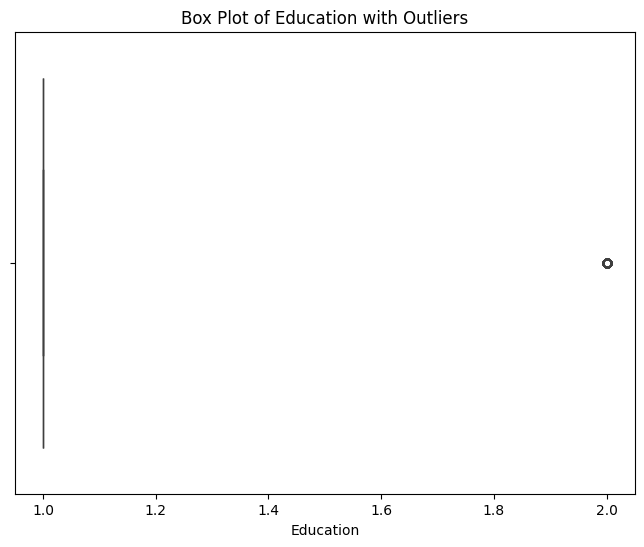

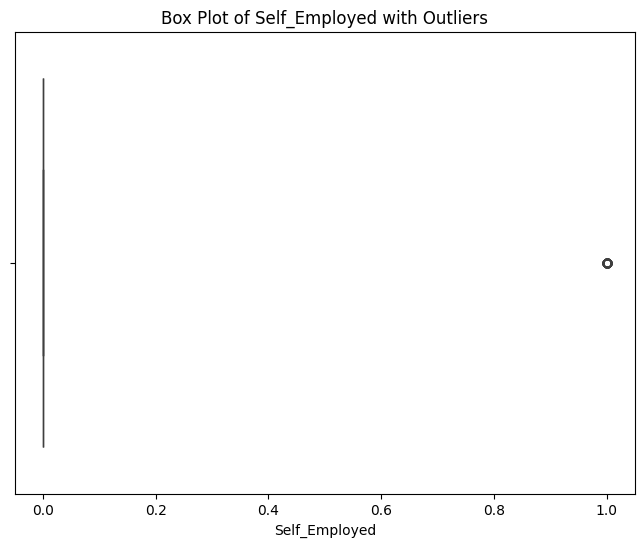

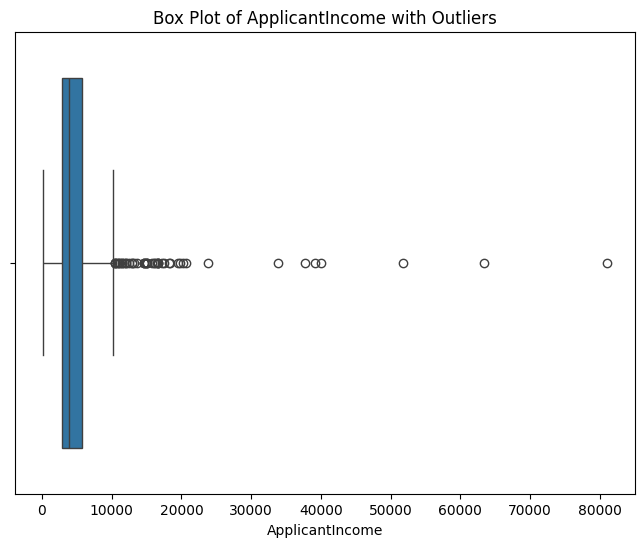

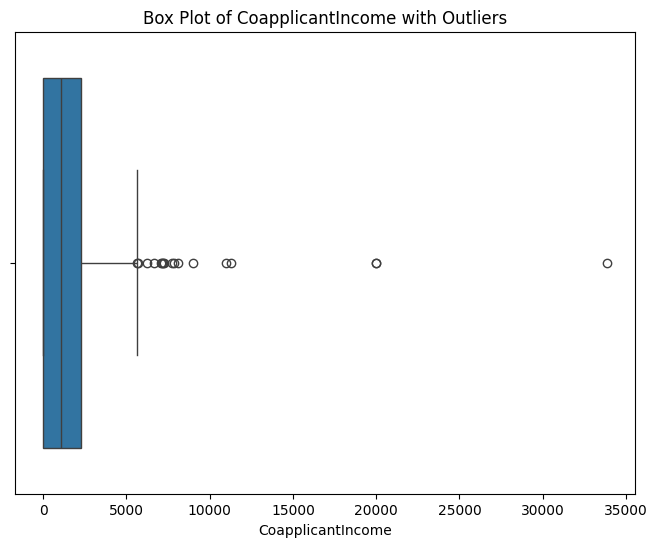

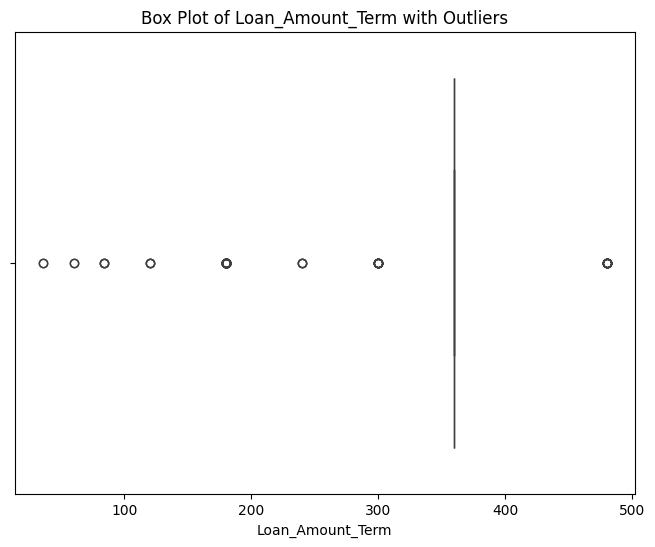

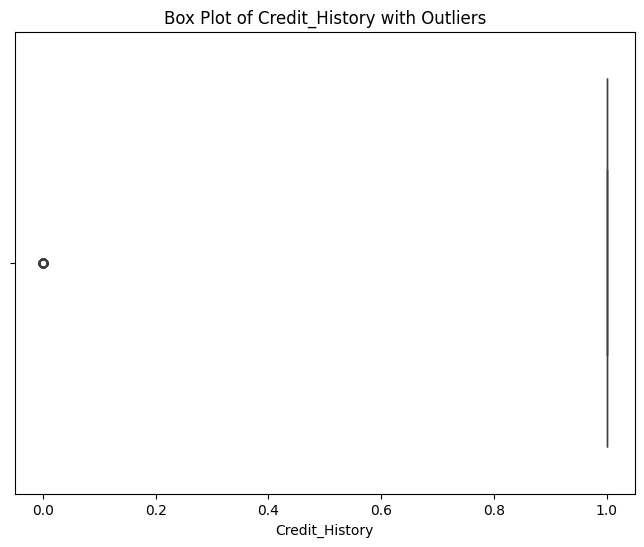

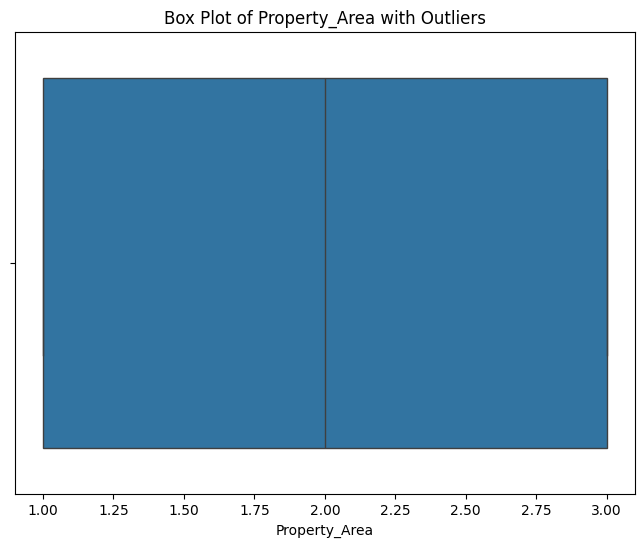

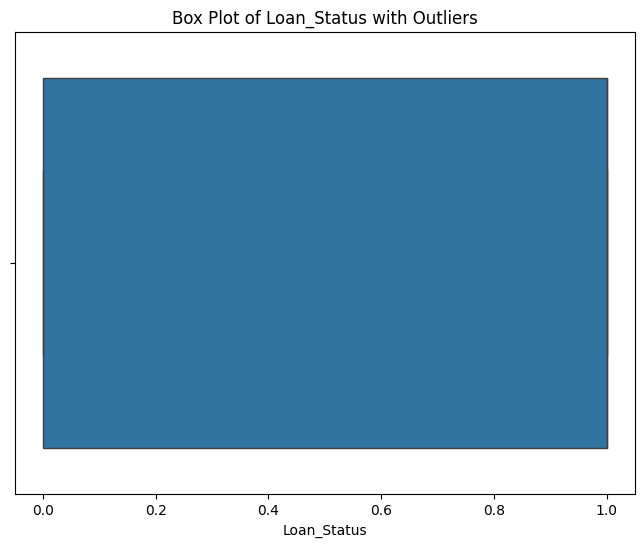

In [16]:
# prompt: plot outliers in box plots

import matplotlib.pyplot as plt
import seaborn as sns

for col in loan_data.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loan_data[col])
    plt.title(f'Box Plot of {col} with Outliers')
    plt.show()


In [15]:
# checking outliers in each column of df loan_data

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in loan_data.select_dtypes(include=['number']):  # Check only numeric columns
    outliers = detect_outliers_iqr(loan_data[col])
    print(f"Outliers in column '{col}':\n{outliers}\n")


Outliers in column 'LoanAmount':
0       3509.4
9        349.0
20       315.0
31       320.0
32      2605.2
50       286.0
63       312.0
76      1437.0
94      8190.0
95      4941.0
105     4470.6
116      370.0
117     3303.0
123      290.0
143      600.0
158      700.0
164      495.0
186     2395.2
239      304.0
257      436.0
262    12400.2
283     1200.0
286      480.0
296     3114.6
297      300.0
298      376.0
306      490.0
323      308.0
340      570.0
343      380.0
351      296.0
377      360.0
399      405.0
402     6028.2
404     2002.8
441     2730.0
449      500.0
471      311.0
480      480.0
481     4060.2
482      400.0
491      324.0
505     2920.2
514      600.0
543      292.0
554      496.0
555     3720.0
Name: LoanAmount, dtype: float64

Outliers in column 'Gender':
16     2
22     2
27     2
34     2
41     2
      ..
539    2
543    2
554    2
559    2
563    2
Name: Gender, Length: 113, dtype: int64

Outliers in column 'Married':
Series([], Name: Married, dty

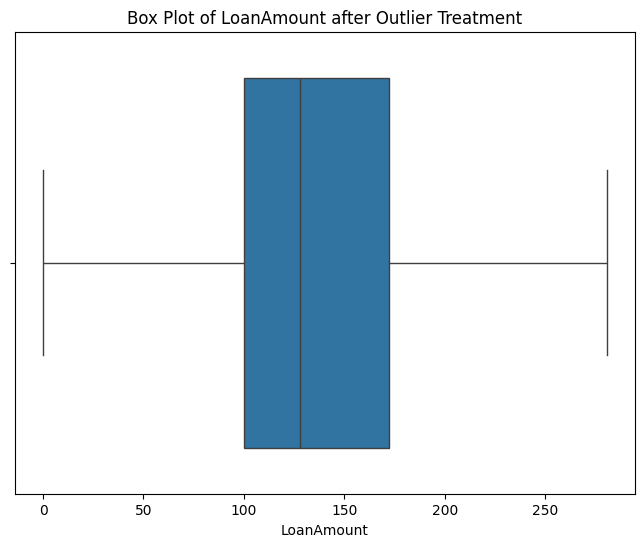

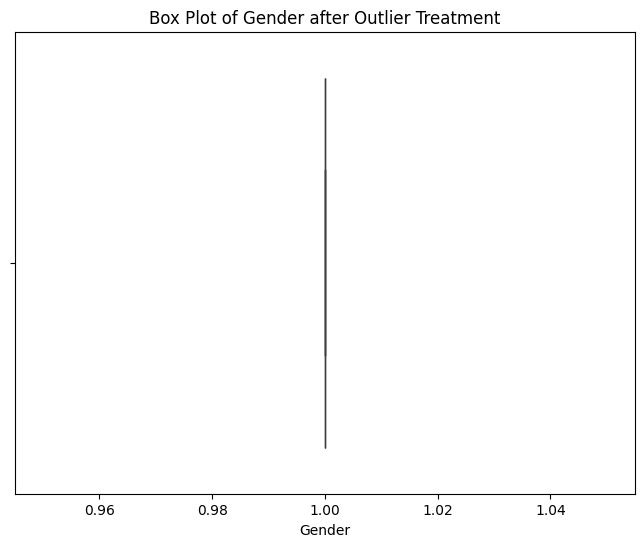

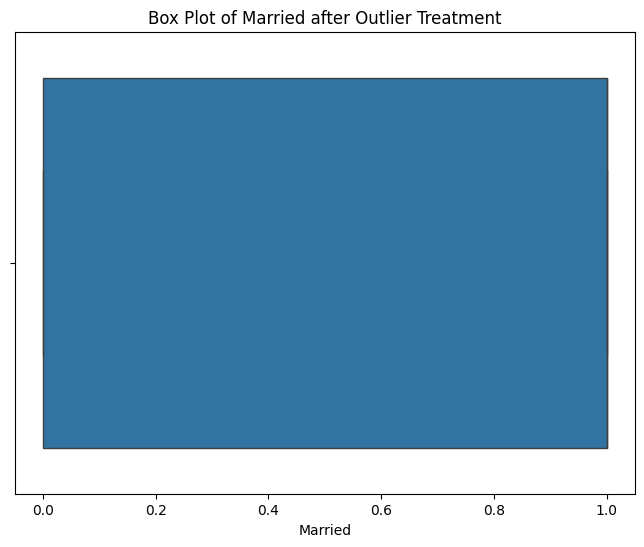

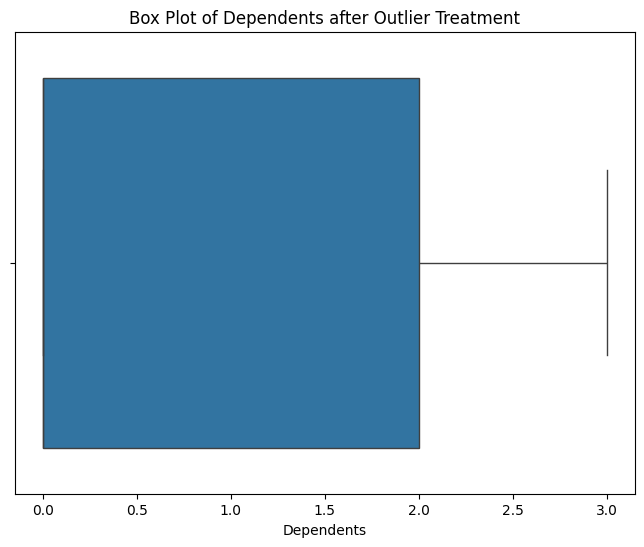

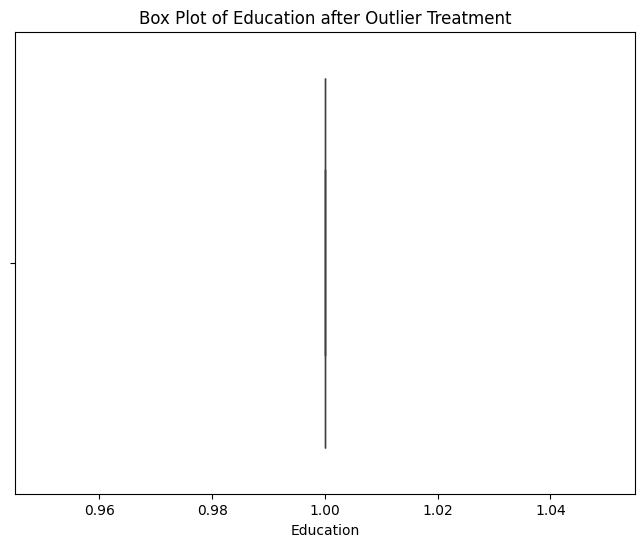

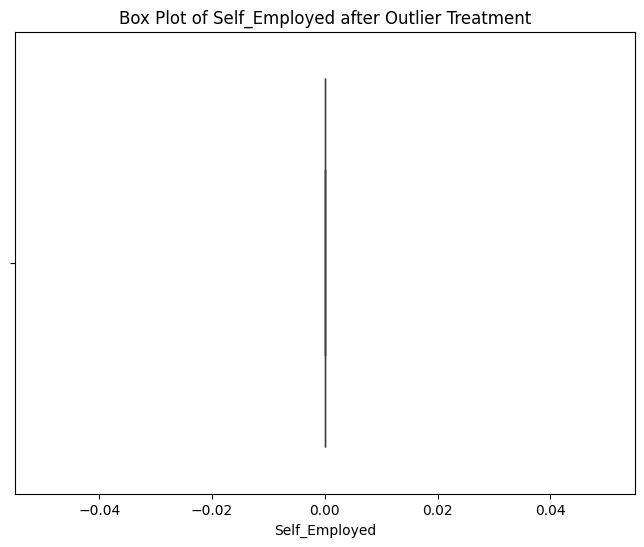

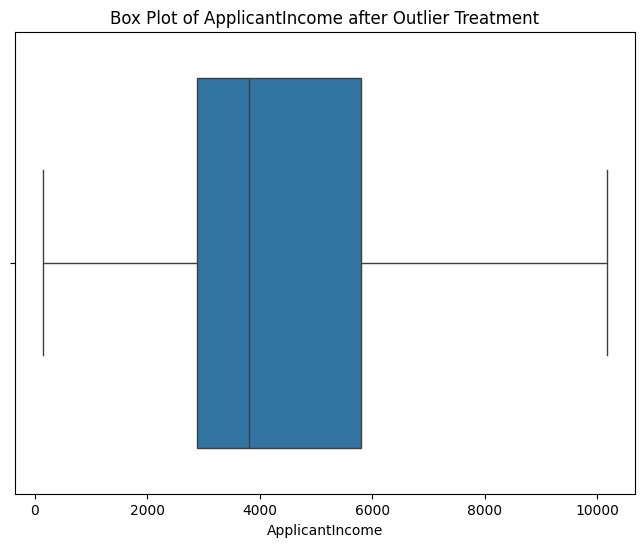

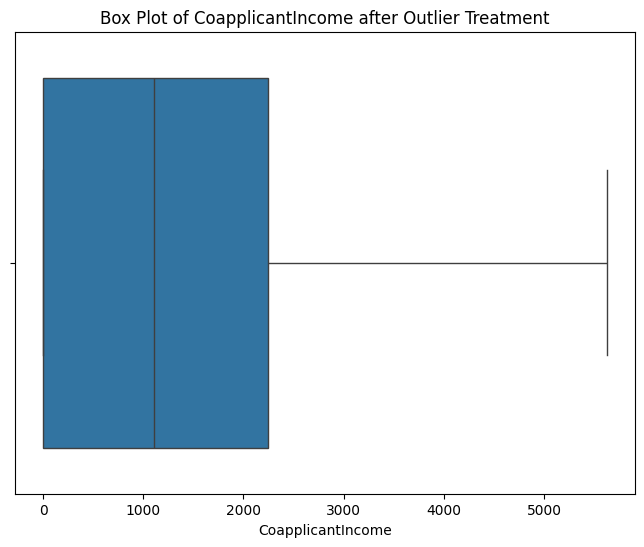

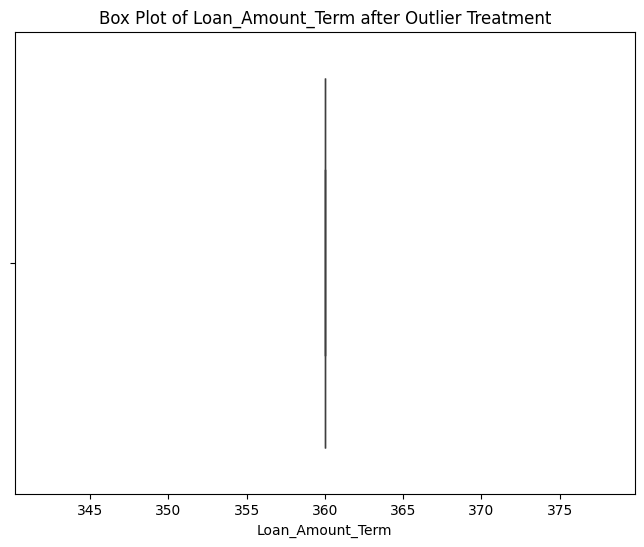

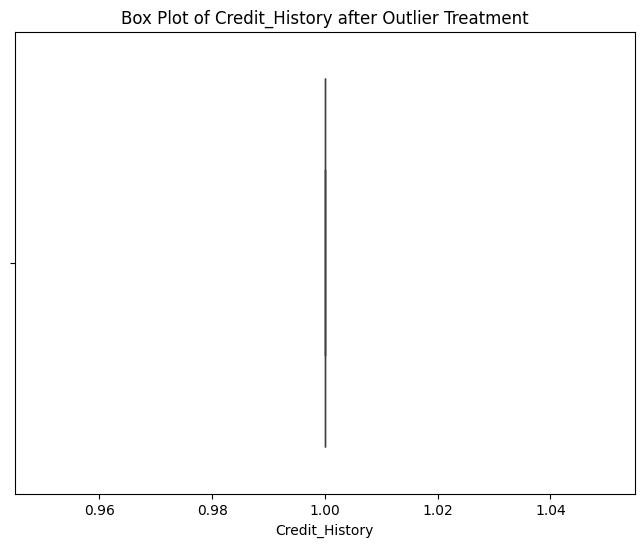

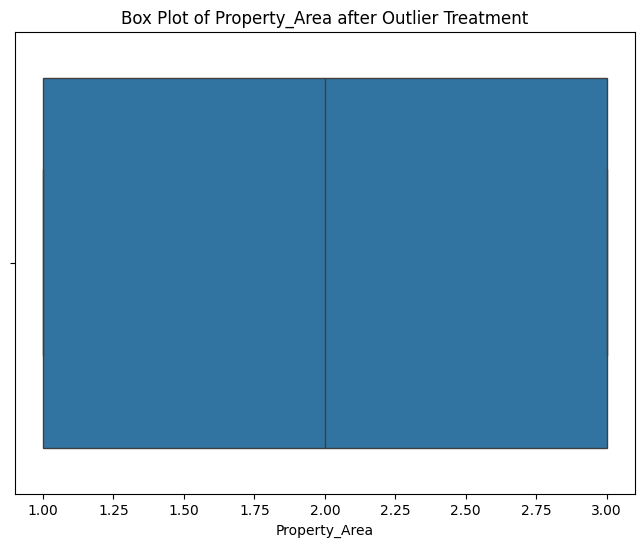

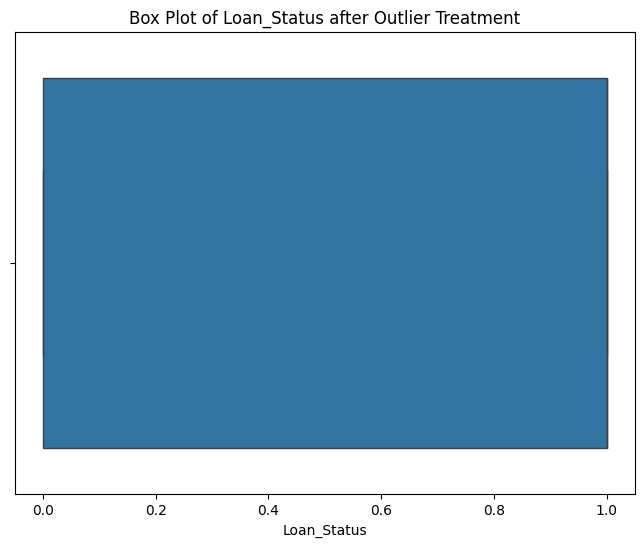

In [17]:
# treat outliers using IQR method

def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Treat outliers (replace with bounds)
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in loan_data.select_dtypes(include=['number']):
    loan_data = treat_outliers_iqr(loan_data, col)

# Now, re-check for outliers (optional) or visualize the data again
for col in loan_data.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loan_data[col])
    plt.title(f'Box Plot of {col} after Outlier Treatment')
    plt.show()


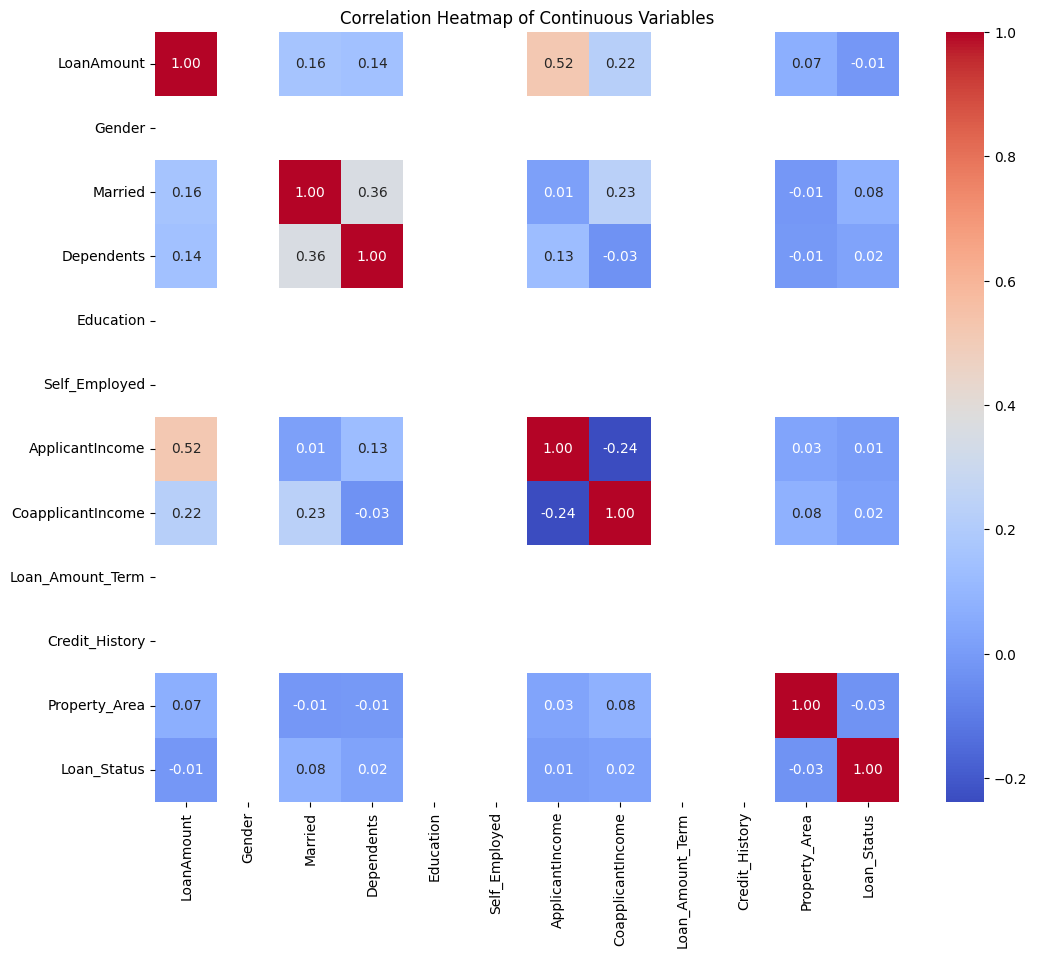

In [26]:
# checking for correlations for all continuous columns of df (heatmap)

continuous_cols = loan_data.select_dtypes(include=['number']).columns

correlations = loan_data[continuous_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

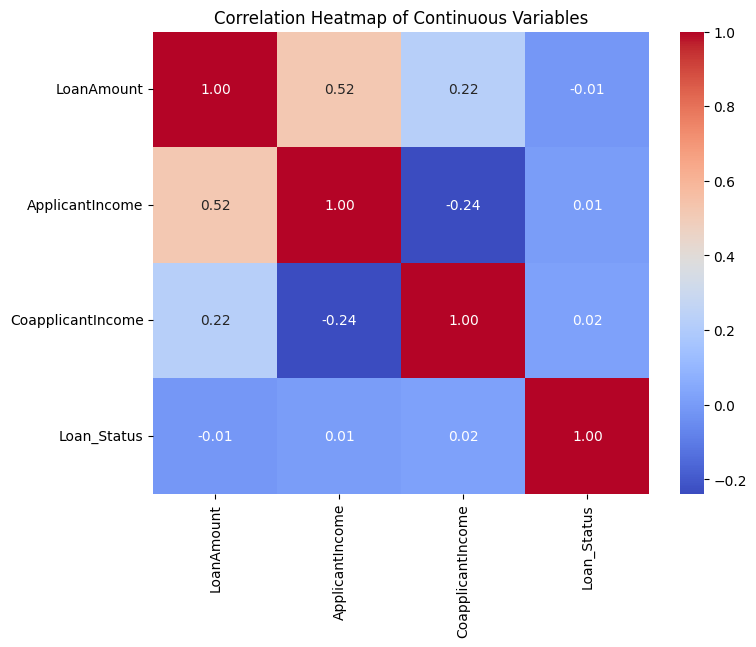

In [28]:
continuous_cols = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']

correlations = loan_data[continuous_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [29]:
# defining all columns of df except Loan_status as x variable (independent) and Loan_Status as y variable (dependent)

x = loan_data.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = loan_data['Loan_Status']

In [32]:
# extracting logistic regression from x and y, set cutoff as 0.5 and display model summary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='liblinear')  # Use 'liblinear' for small datasets
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Use statsmodels for a detailed summary
x_train_sm = sm.add_constant(x_train)  # Add a constant for the intercept
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())


# Set a custom cutoff (threshold)
cutoff = 0.5
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
y_pred_custom = (y_pred_prob >= cutoff).astype(int)




              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.65      1.00      0.79        74

    accuracy                           0.65       113
   macro avg       0.33      0.50      0.40       113
weighted avg       0.43      0.65      0.52       113

[[ 0 39]
 [ 0 74]]
                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  451
Model:                            GLM   Df Residuals:                      444
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.74
Date:                Mon, 15 Sep 2025   Deviance:                       551.49
Time:                        18:10:11   Pearson chi2:                     451.
No. Iterations:       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# drop columns having p values greater than 0.05 except constant one by one in descending order

import statsmodels.api as sm

def drop_columns_by_pvalue(res, x_train, y_train, threshold=0.05):
    """
    Drops columns from a statsmodels GLM result based on p-values.

    Args:
        res: The result of the statsmodels GLM fit.
        x_train: The training features (DataFrame).
        y_train: The training target variable (Series).
        threshold: The p-value threshold for dropping columns.

    Returns:
       The updated training features with columns dropped.
    """

    p_values = res.pvalues
    # Exclude the constant
    p_values = p_values.drop('const', errors='ignore')

    # Sort columns by p-value in descending order
    columns_to_drop = p_values[p_values > threshold].sort_values(ascending=False).index.tolist()

    # Drop columns one-by-one in the specified order
    for column in columns_to_drop:
        if column in x_train.columns: # Check if column still exists
          x_train = x_train.drop(column, axis=1)

          # Refit the model after dropping each column
          x_train_sm = sm.add_constant(x_train)
          logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
          res = logm1.fit()

    return x_train

In [31]:
# drop columns having p values greater than 0.05 except constant one by one in descending order

import statsmodels.api as sm

def drop_columns_by_pvalue(res, x_train, y_train, threshold=0.05):
    """
    Drops columns from a statsmodels GLM result based on p-values.

    Args:
        res: The result of the statsmodels GLM fit.
        x_train: The training features (DataFrame).
        y_train: The training target variable (Series).
        threshold: The p-value threshold for dropping columns.

    Returns:
       The updated training features with columns dropped.
    """

    p_values = res.pvalues
    # Exclude the constant
    p_values = p_values.drop('const', errors='ignore')

    # Sort columns by p-value in descending order
    columns_to_drop = p_values[p_values > threshold].sort_values(ascending=False).index.tolist()

    # Drop columns one-by-one in the specified order
    for column in columns_to_drop:
        if column in x_train.columns: # Check if column still exists
          x_train = x_train.drop(column, axis=1)

          # Refit the model after dropping each column
          x_train_sm = sm.add_constant(x_train)
          logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
          res = logm1.fit()

    return x_train


#Example usage (assuming x_train and y_train are defined):
x_train_updated = drop_columns_by_pvalue(res, x_train, y_train)
x_train_updated.columns



Index(['Married'], dtype='object')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.65      1.00      0.79        74

    accuracy                           0.65       113
   macro avg       0.33      0.50      0.40       113
weighted avg       0.43      0.65      0.52       113

AUC: 0.4923769923769924


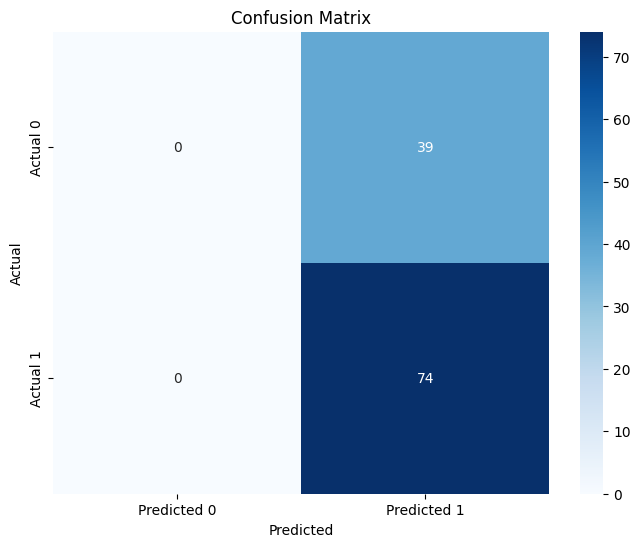

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  451
Model:                            GLM   Df Residuals:                      449
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.79
Date:                Mon, 15 Sep 2025   Deviance:                       553.58
Time:                        18:00:02   Pearson chi2:                     451.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01137
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5108      0.159      3.205      0.0

In [25]:
# prompt: display model summary and all p values along with AUC and confusion matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...


# After dropping columns based on p-values and refitting the model:
x_test_updated = x_test[x_train_updated.columns]  # Keep only columns in the updated training set
logreg_updated = LogisticRegression(solver='liblinear')
logreg_updated.fit(x_train_updated, y_train)

y_pred_updated = logreg_updated.predict(x_test_updated)
y_pred_prob_updated = logreg_updated.predict_proba(x_test_updated)[:,1]

print(classification_report(y_test,y_pred_updated))


# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob_updated)
print(f"AUC: {auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_updated)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

x_train_sm_updated = sm.add_constant(x_train_updated)
logm1_updated = sm.GLM(y_train, x_train_sm_updated, family = sm.families.Binomial())
res_updated = logm1_updated.fit()

print(res_updated.summary())
